In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
iris.data[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [4]:
iris_x = iris.data[:, :2]
iris_x = iris_x[:100]
iris_x[:3]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2]])

In [5]:
iris_y = iris.target[:]
iris_y = iris_y[:100]
iris_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

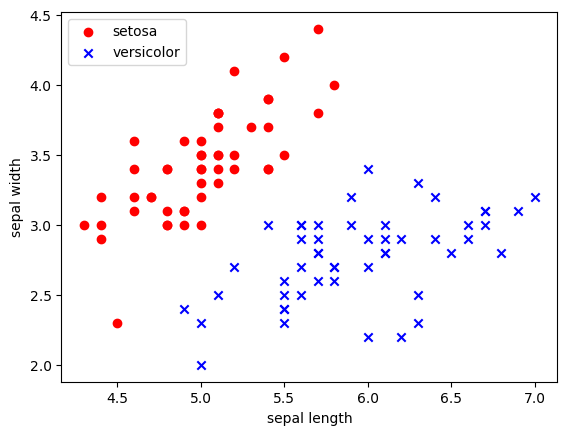

In [6]:
features = iris_x.T
plt.scatter(features[0][:50], features[1][:50], color='red', marker='o', label='setosa')
plt.scatter(features[0][50:], features[1][50:], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(loc='upper left')
plt.show()

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [11]:
def loss(f, y):
    return -(y * np.log(f) + (1 - y) * np.log(1 - f)).mean()

In [12]:
def train(x, y, w, alpha, epochs):
    history = []
    ones = np.ones((x.shape[0], 1))
    x = np.concatenate((ones, x), axis=1)
    for i in range(epochs):
        z = np.dot(x, w)
        f = sigmoid(z)
        gradient = np.dot(x.T, (f - y)) / y.size
        w -= alpha * gradient
        history.append((loss(f, y), w[0], w[1], w[2]))
        if(i % 500 == 0):
            z = np.dot(x, w)
            f = sigmoid(z)
            print(f'Epoche {i}: Loss = {loss(f, y)} \t')
    return history

In [13]:
def predict(x, w, threshold=0.5):
    ones = np.ones((x.shape[0], 1))
    x = np.concatenate((ones, x), axis=1)
    return sigmoid(np.dot(x, w)) >= threshold

In [14]:
w = np.zeros(iris_x.shape[1] + 1)
history = train(iris_x, iris_y, w, 0.1, 20000)

Epoche 0: Loss = 0.685802727822415 	
Epoche 500: Loss = 0.1435077230792651 	
Epoche 1000: Loss = 0.09989369821855715 	
Epoche 1500: Loss = 0.08292331668333791 	
Epoche 2000: Loss = 0.07365438313023151 	
Epoche 2500: Loss = 0.06772283851752295 	
Epoche 3000: Loss = 0.06355494554767765 	
Epoche 3500: Loss = 0.06043782562823827 	
Epoche 4000: Loss = 0.0579994766792833 	
Epoche 4500: Loss = 0.05602596346192948 	
Epoche 5000: Loss = 0.05438518040242759 	
Epoche 5500: Loss = 0.05299098651395044 	
Epoche 6000: Loss = 0.05178474071458257 	
Epoche 6500: Loss = 0.05072510345575388 	
Epoche 7000: Loss = 0.04978207702927587 	
Epoche 7500: Loss = 0.04893335758745598 	
Epoche 8000: Loss = 0.048162013817947755 	
Epoche 8500: Loss = 0.04745496027650863 	
Epoche 9000: Loss = 0.04680192442815358 	
Epoche 9500: Loss = 0.04619473025595247 	
Epoche 10000: Loss = 0.0456267905229231 	
Epoche 10500: Loss = 0.04509273993624605 	
Epoche 11000: Loss = 0.044588165533035934 	
Epoche 11500: Loss = 0.044109405451722

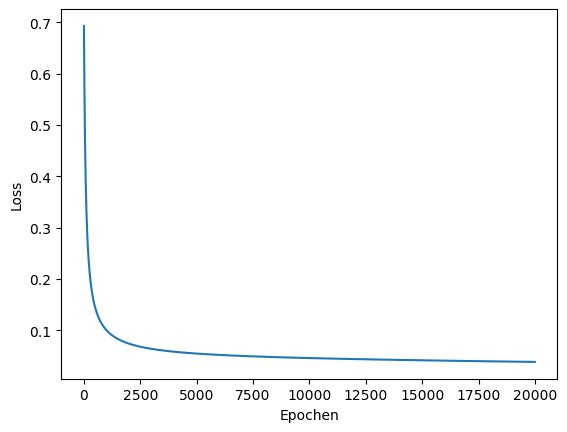

In [16]:
losses = [x[0] for x in history]
plt.plot(range(len(losses)), losses, label='Loss-Entwiclung')
plt.ylabel("Loss")
plt.xlabel("Epochen")
plt.show()

In [17]:
preds = predict(iris_x, w)
(preds == iris_y).mean()

0.99

In [18]:
w

array([ -5.68144513,   6.99489916, -10.40887421])

In [21]:
def value(x):
    return - w[0]/w[2] - w[1]/w[2] * x

print(value(4), value(7))

2.142225092995891 4.158264201898952


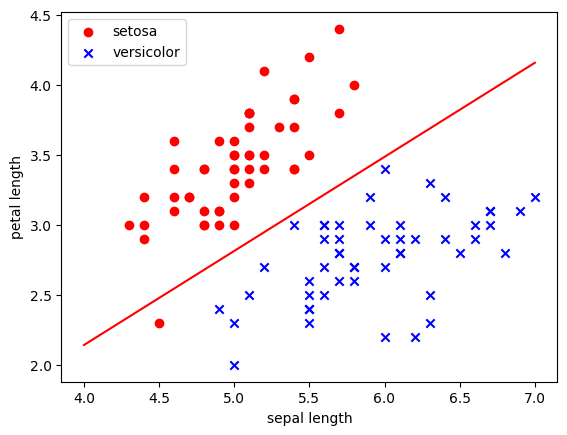

In [22]:
plt.scatter(features[0][:50], features[1][:50], color='red', marker='o', label='setosa')
plt.scatter(features[0][50:], features[1][50:], color='blue', marker='x', label='versicolor')
plt.plot([4, 7], [value(4), value(7)], 'r-') 
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

In [23]:
from sklearn.datasets import load_digits
mnist = load_digits()
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [24]:
mnist_x = mnist['data']
mnist_x.shape

(1797, 64)

In [26]:
mnist_x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [27]:
mnist_y = mnist['target']
mnist_y.shape

(1797,)

(-0.5, 7.5, 7.5, -0.5)

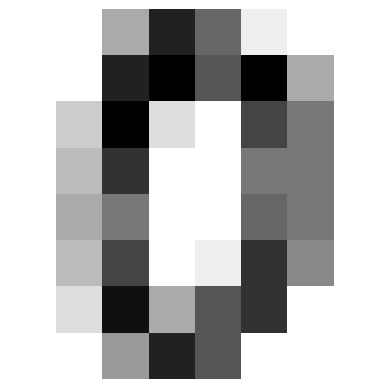

In [33]:
%matplotlib inline
sample = mnist_x[0]
image = sample.reshape(8, 8)
plt.imshow(image, cmap=matplotlib.cm.binary)
plt.axis("off")

In [34]:
mnist_y[0]

0

In [36]:
mnist_y = mnist_y.astype(np.uint8)
mnist_y[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
      dtype=uint8)

In [37]:
mnist_x = mnist_x/16
mnist_x[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [38]:
x_train, x_test, y_train, y_test = mnist_x[:1500], mnist_x[1500:], mnist_y[:1500], mnist_y[1500:]

In [39]:
y_train5 = (y_train == 5)
y_test5 = (y_test == 5)

y_train5[:20] # Testausgabe

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False])

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [41]:
model.fit(x_train, y_train5)

LogisticRegression()

In [42]:
y_pred5 = model.predict(x_test)
y_pred5

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,

In [43]:
(y_pred5 == y_test5).mean()

0.9932659932659933

In [44]:
model = LogisticRegression(max_iter=200)

In [45]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [47]:
y_pred = model.predict(x_test)
y_pred

array([1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 5, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9,
       8, 0, 1, 2, 3, 4, 5, 1, 8, 1, 9, 0, 1, 2, 3, 4, 5, 6, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 5, 9, 4, 9, 5, 5, 6, 5, 0, 8, 8, 5, 8, 4, 1, 7, 7,
       3, 5, 1, 6, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 8, 7, 7, 7, 3, 4, 6, 6,
       6, 9, 9, 1, 5, 0, 9, 5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 9, 6, 3, 1,
       3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7,
       2, 2, 5, 7, 8, 5, 9, 4, 5, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8,
       9, 0, 1, 2, 8, 4, 5, 6, 7, 8, 9, 0, 1, 2, 5, 4, 5, 6, 7, 8, 9, 0,
       9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 7, 5, 1, 0, 0, 2, 2, 7,
       8, 2, 0, 1, 2, 6, 8, 8, 7, 5, 8, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5,
       2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8,
       4, 5, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7,
       9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8], dtype=uint

In [48]:
(y_pred == y_test).mean()

0.9158249158249159